In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as pe

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout

from tensorflow.keras import initializers
from tensorflow.keras import constraints
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import losses
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.metrics import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError
from tensorflow.keras.models import load_model

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Life Expectancy Data.csv')

df = data.copy()

df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Country,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan
Year,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006
Status,Developing,Developing,Developing,Developing,Developing,Developing,Developing,Developing,Developing,Developing
Life expectancy,65.0,59.9,59.9,59.5,59.2,58.8,58.6,58.1,57.5,57.3
Adult Mortality,263.0,271.0,268.0,272.0,275.0,279.0,281.0,287.0,295.0,295.0
infant deaths,62,64,66,69,71,74,77,80,82,84
Alcohol,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.03,0.02,0.03
percentage expenditure,71.279624,73.523582,73.219243,78.184215,7.097109,79.679367,56.762217,25.873925,10.910156,17.171518
Hepatitis B,65.0,62.0,64.0,67.0,68.0,66.0,63.0,64.0,63.0,64.0
Measles,1154,492,430,2787,3013,1989,2861,1599,1141,1990


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [4]:
for col in df.columns:

    if df[col].isnull().any(): 
        df[col] = df[col].fillna(value=df[col].mean())

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
Life expectancy,2938.0,6.922493e+01,9.507640e+00,36.30000,63.200000,7.200000e+01,7.560000e+01,8.900000e+01
Adult Mortality,2938.0,1.647964e+02,1.240803e+02,1.00000,74.000000,1.440000e+02,2.270000e+02,7.230000e+02
infant deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2938.0,4.602861e+00,3.916288e+00,0.01000,1.092500,4.160000e+00,7.390000e+00,1.787000e+01
percentage expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
Hepatitis B,2938.0,8.094046e+01,2.258685e+01,1.00000,80.940461,8.700000e+01,9.600000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
BMI,2938.0,3.832125e+01,1.992768e+01,1.00000,19.400000,4.300000e+01,5.610000e+01,8.730000e+01
under-five deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03


<Axes: >

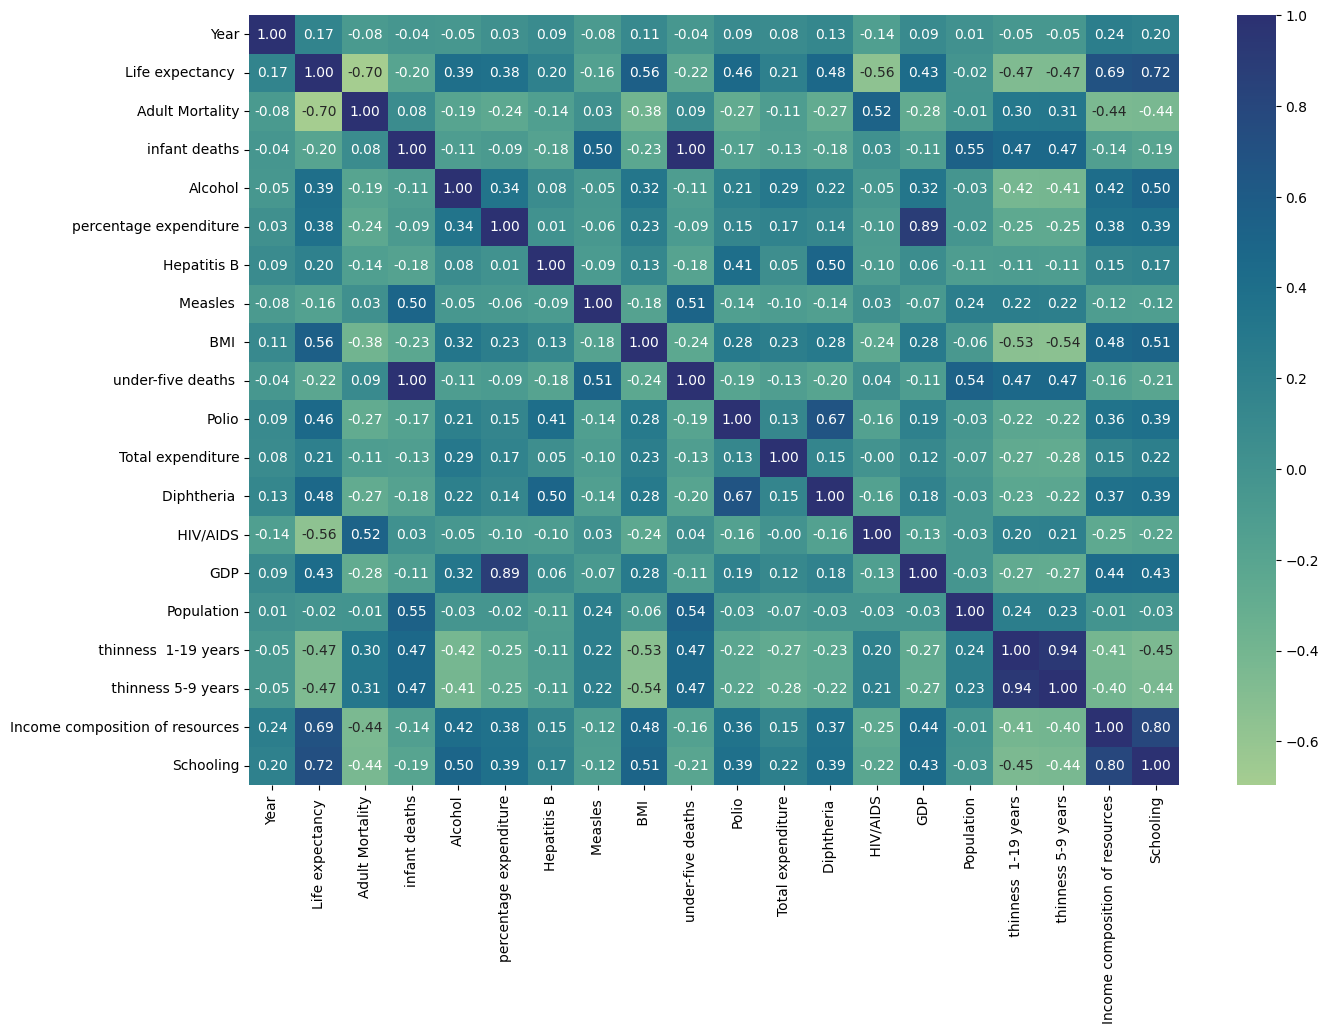

In [6]:
correlation_ = df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_, fmt='.2f', annot=True, cmap='crest')

In [7]:
df.drop('infant deaths',axis=1, inplace=True) # 'infant deaths' and 'under-five deaths ' are same

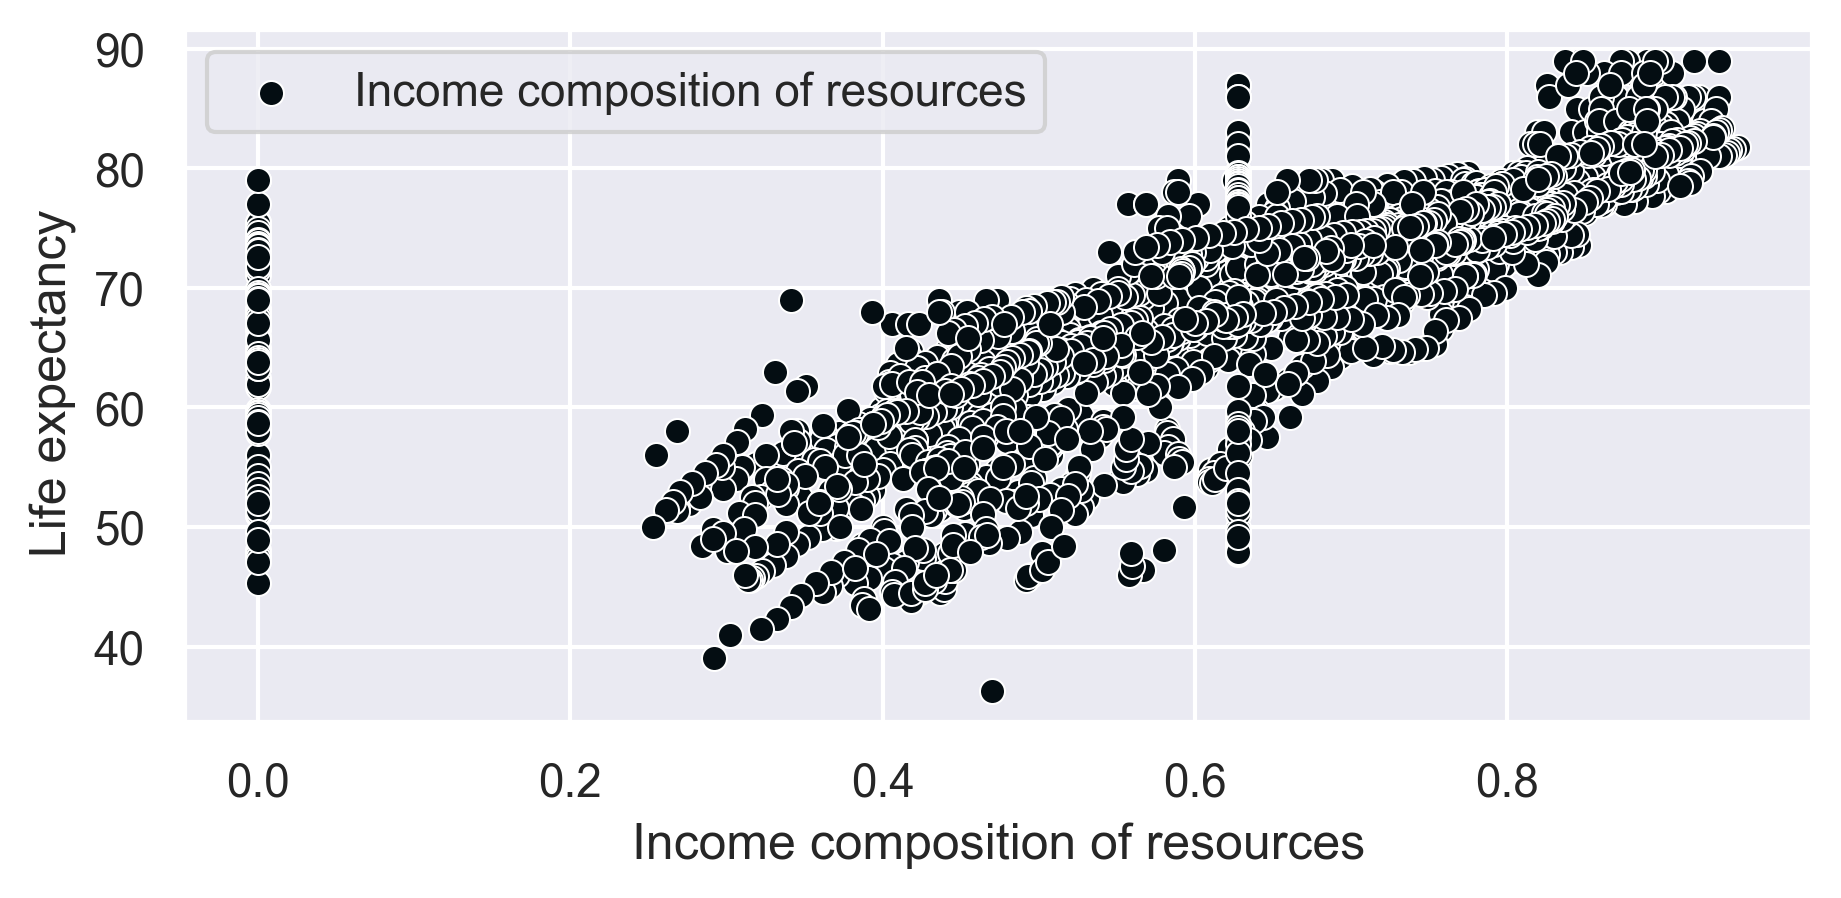

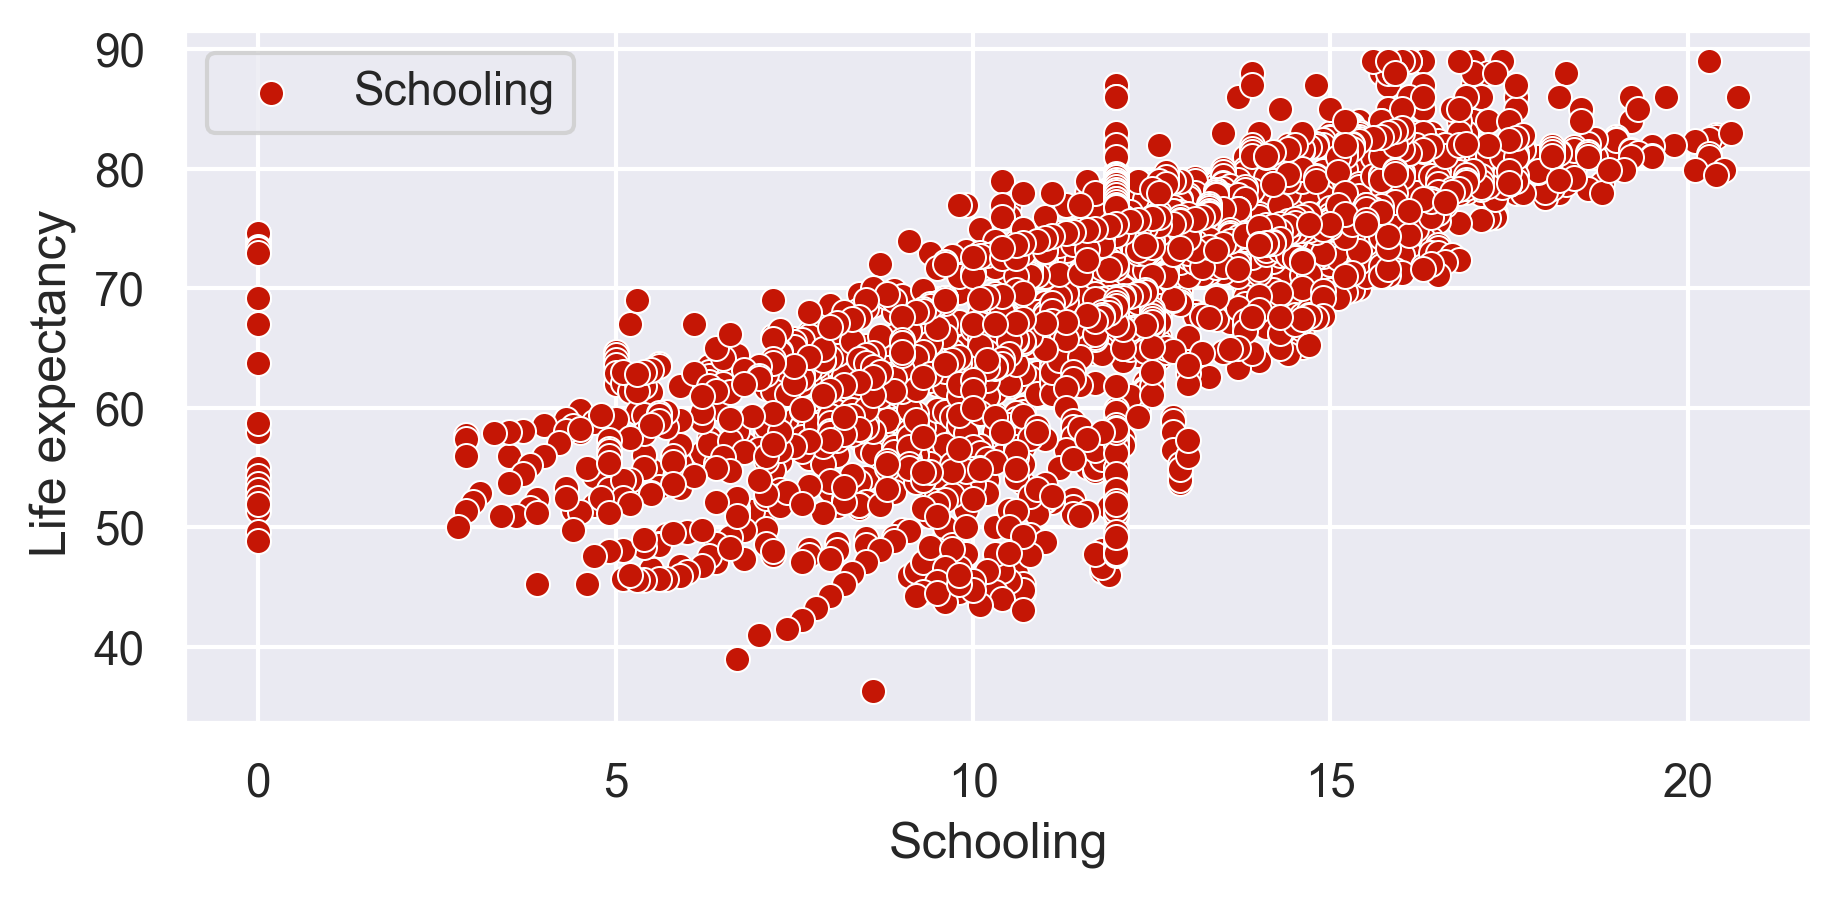

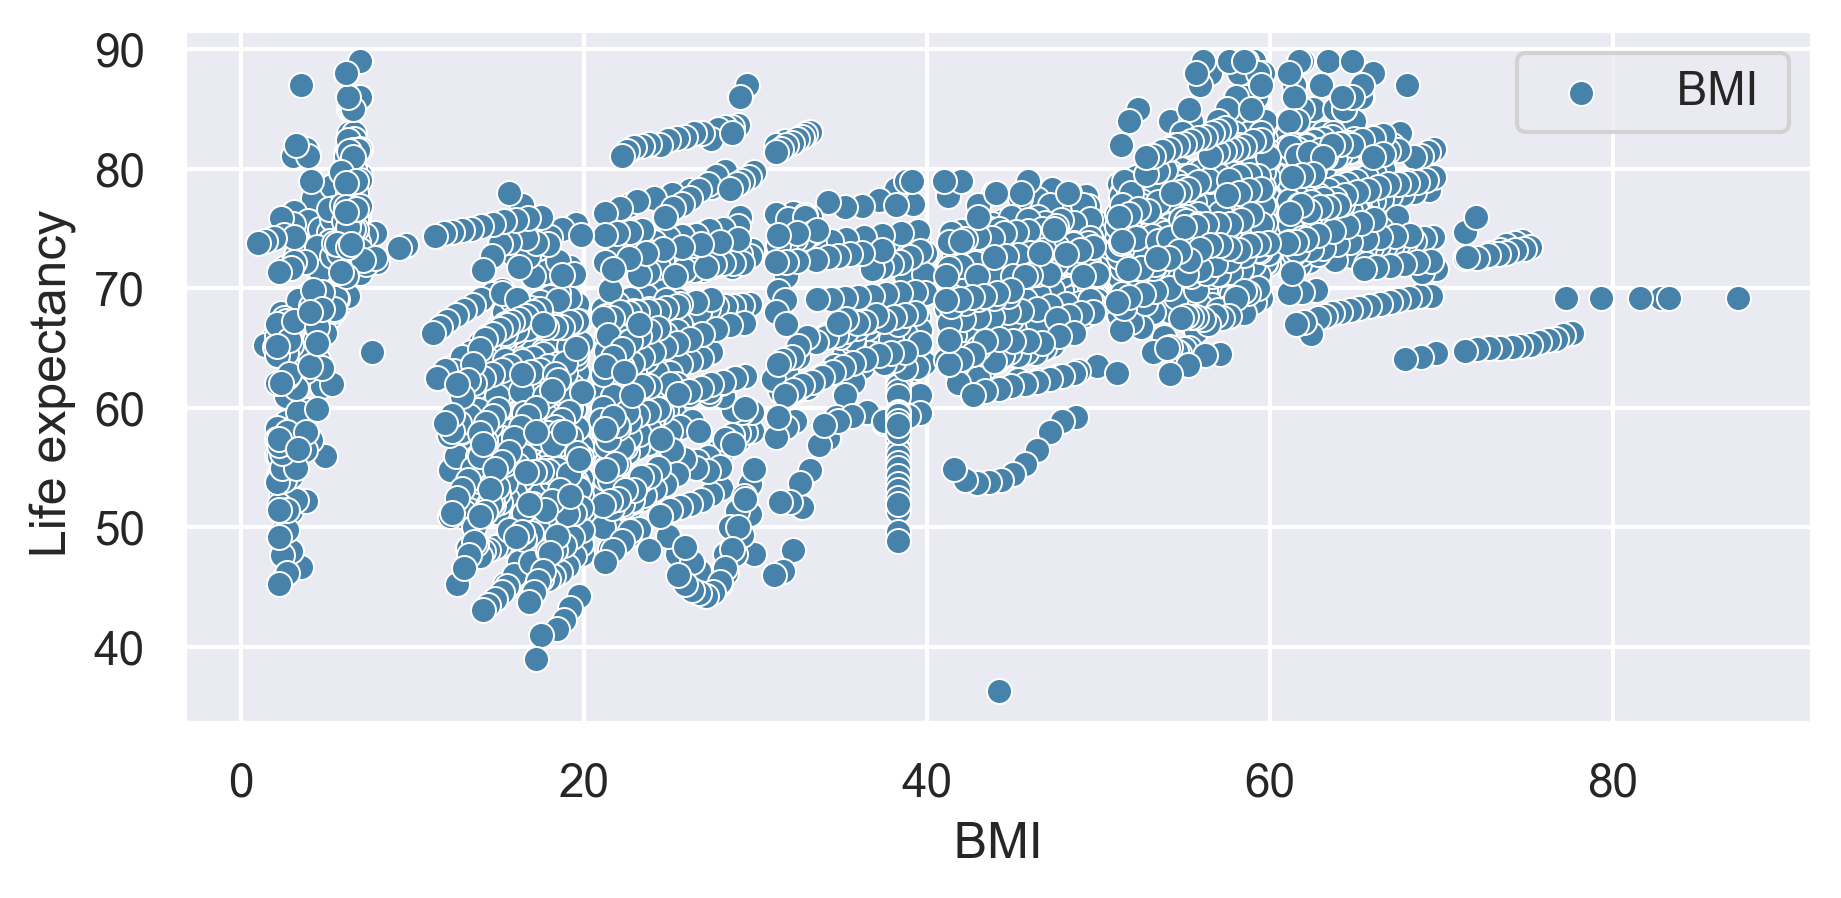

In [8]:
colors = ['#040D12', '#C51605', '#4682A9'] 

for i, feature in enumerate(['Income composition of resources', 'Schooling', ' BMI ']):

    sns.set_theme()
    sns.set(rc={'figure.dpi': 300})
    plt.figure(figsize=(7, 3))
    sns.scatterplot(x=df[feature], y=df['Life expectancy '], data=df, color=colors[i], label=feature)
    plt.legend()  
    plt.show()

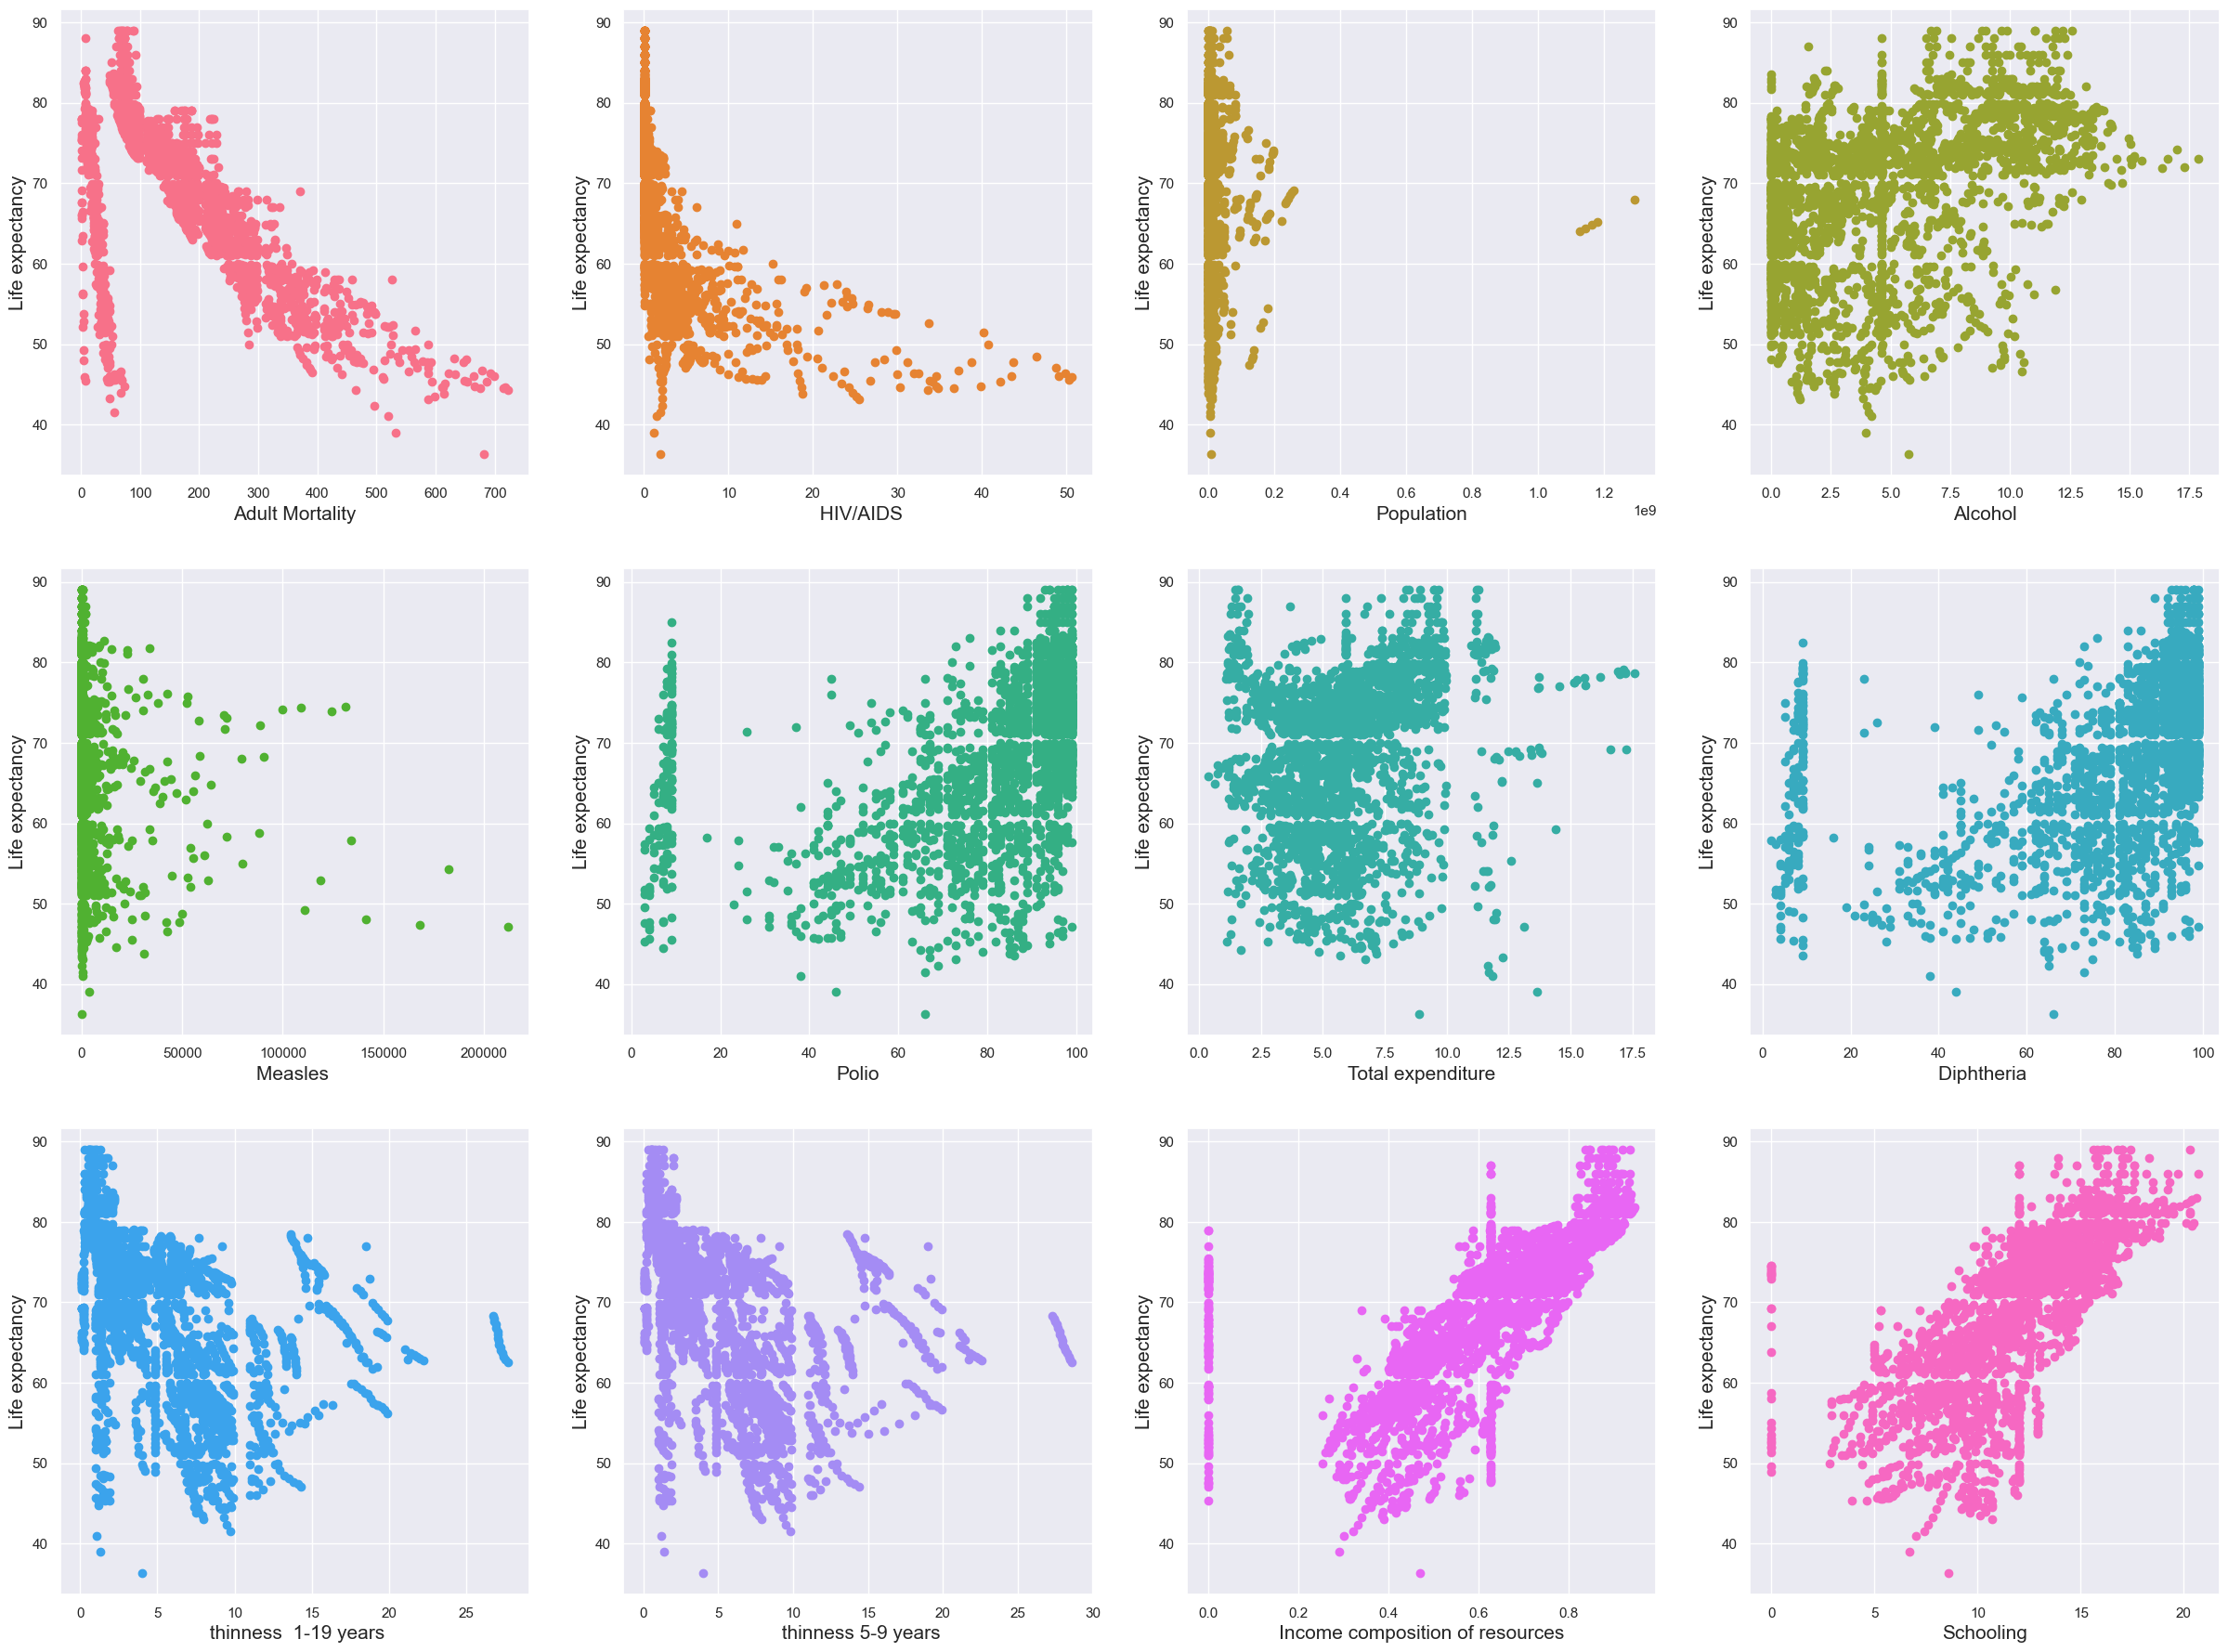

In [9]:
features=[
    'Adult Mortality',' HIV/AIDS','Population','Alcohol','Measles ',
    'Polio','Total expenditure','Diphtheria ',' thinness  1-19 years',
    ' thinness 5-9 years','Income composition of resources','Schooling'
]

plt.figure(figsize=(30,30),dpi=100)
colors = sns.color_palette("husl", len(features))

for index, feature in enumerate(df[features]):
    plt.subplot(4, 4, index+1)
    plt.scatter(df[feature], df['Life expectancy '], color=colors[index])
    plt.xlabel(feature,size=15)
    plt.ylabel('Life expectancy',size=15)
plt.show()

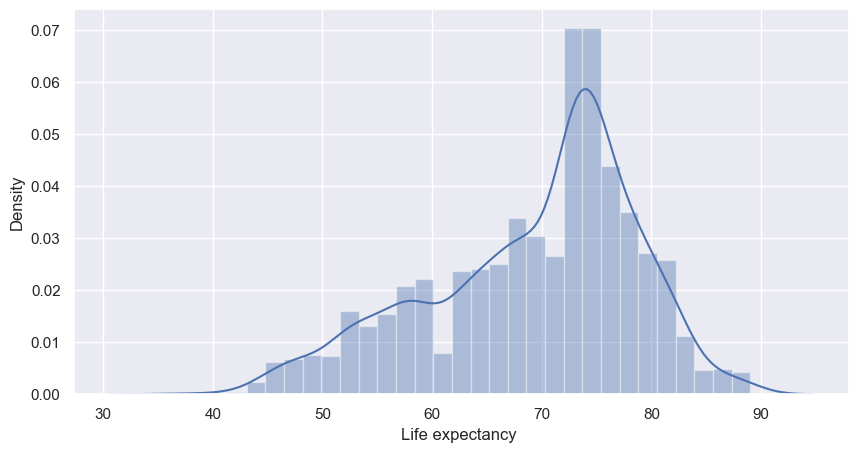

In [10]:
plt.figure(figsize=(10, 5), dpi=100)
sns.distplot(df['Life expectancy '])
plt.show()

In [11]:
pe.violin(df, x='Status', y='Life expectancy ', color=df['Status'])

In [12]:
# for detail click the year or status

sun_plot = pe.sunburst(
    df, 
    path=['Status', 'Year', 'Country'],
    values='Population',
    color='Life expectancy ',
    color_continuous_scale='rainbow',
    color_continuous_midpoint=df['Life expectancy '].mean()
)
sun_plot.update_layout(width=900, height=700)
sun_plot.show()

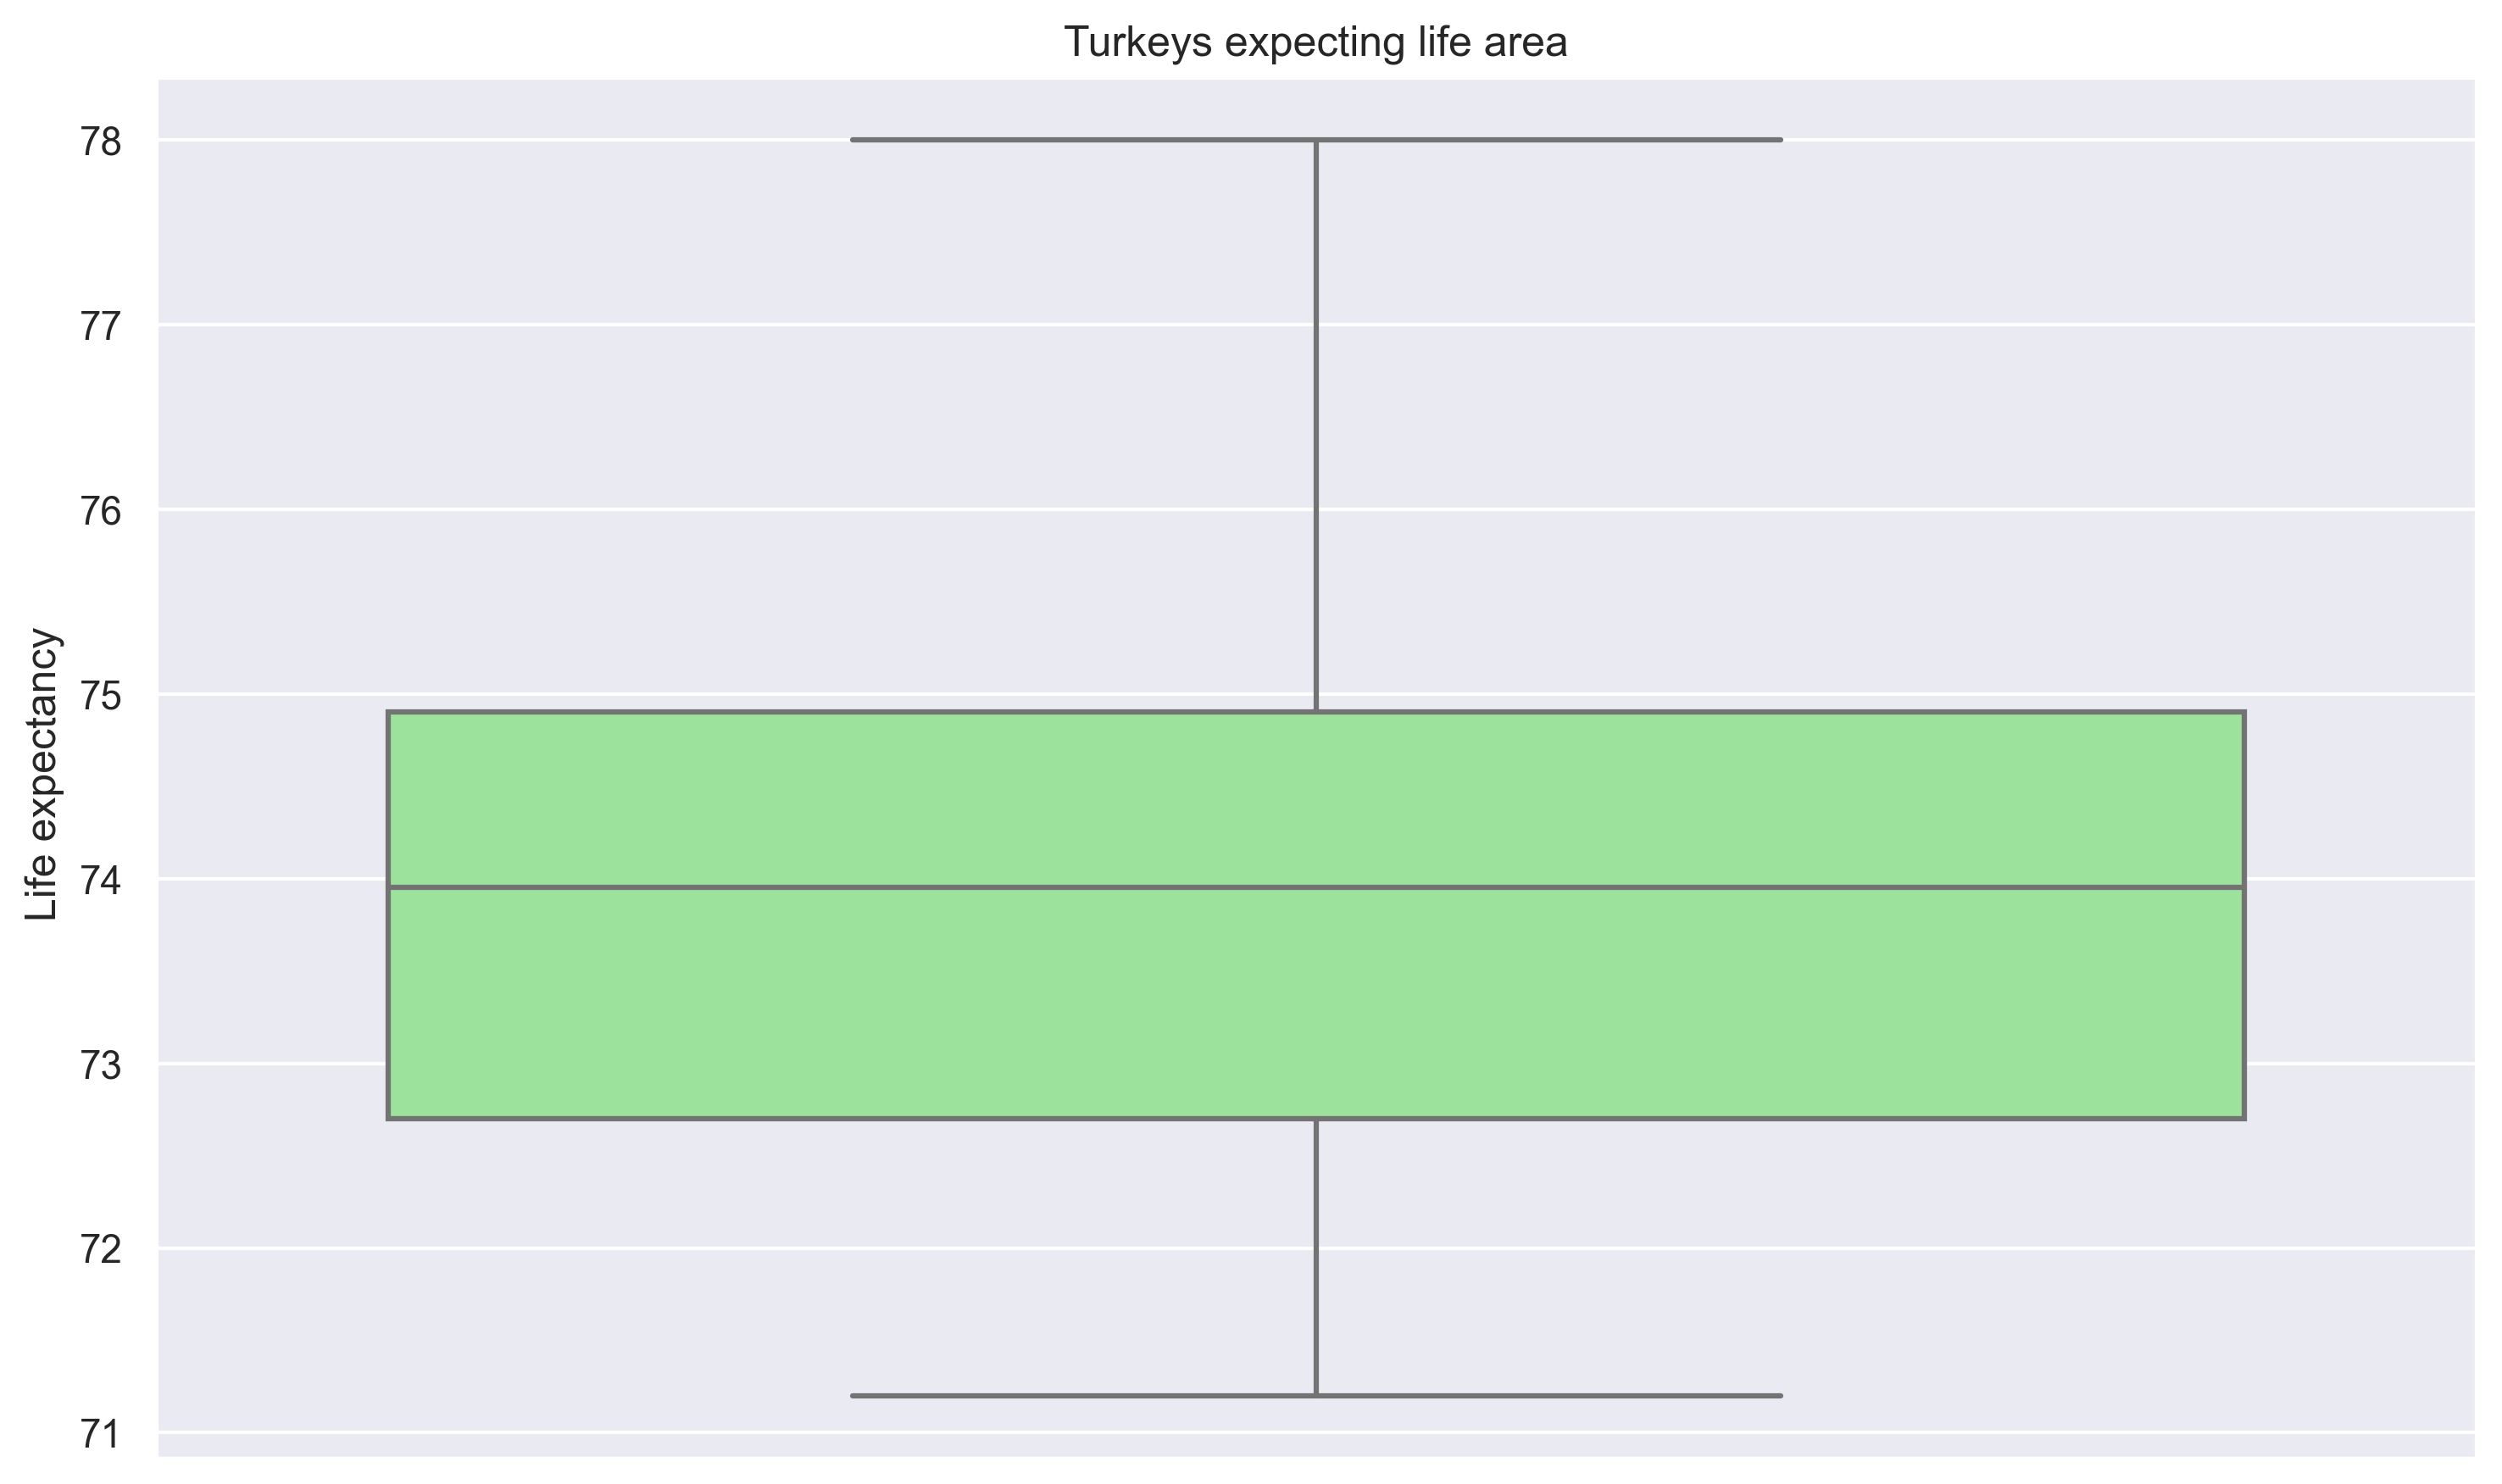

In [13]:
plt.figure(figsize=(10, 6))

sns.boxplot(y=df[df['Country'] == 'Turkey']['Life expectancy '], color='lightgreen')
plt.title('Turkeys expecting life area')
plt.ylabel('Life expectancy ')
plt.tight_layout()

In [14]:
le = LabelEncoder()

df['Country'] = le.fit_transform(df['Country'])
df['Year'] = le.fit_transform(df['Year'])
df['Status'] = le.fit_transform(df['Status'])

In [15]:
y = df['Life expectancy '].values.reshape(-1, 1)
X = df.drop(columns=['Life expectancy '], axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error

''' 
min_ = 10000
a = 0

for i in range(1, 100):

    model_KNN = KNeighborsRegressor(n_neighbors=i)
    model_KNN.fit(X_train, y_train)


    if mean_squared_error(y_test, model_KNN.predict(X_test)) < min_ :
        min_ = mean_squared_error(y_test, model_KNN.predict(X_test)) # 
        a = i # 

'''
model_KNN = KNeighborsRegressor(n_neighbors=2)
model_KNN.fit(X_train, y_train)
mean_absolute_error(y_test, model_KNN.predict(X_test))

1.6090988717891523

In [ ]:
"""
Input(
    shape=None,
    batch_size=None,
    name=None,
    dtype=None,
    sparse=None,
    tensor=None,
    ragged=None,
    type_spec=None,
    **kwargs,
)

Dense(
    units, => 
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs,
)

model.fit(
    x=None,
    y=None,
    batch_size=None,
    epochs=1,
    verbose='auto',
    callbacks=None,
    validation_split=0.0,
)

model.compile(
    optimizer='rmsprop',
    loss=None,
    metrics=None,
    loss_weights=None,
    weighted_metrics=None,
    run_eagerly=None,
    steps_per_execution=None,
    jit_compile=None,
    pss_evaluation_shards=0,
    **kwargs,
)
"""

In [17]:
model = Sequential()


#! Input Layer ----------------------------------------------------
model.add(
    Input(
        shape=X.shape[1],
        batch_size=None, #Default
        name=None, #Default
        dtype=None, #Default
        sparse=None, #Default
        tensor=None, #Default
        ragged=None, #Default
        type_spec=None, #Default
    )
)

#! Hidden Layer ----------------------------------------------------
model.add(
    Dense(
        units=128,
        use_bias=True, #Default
        kernel_constraint=constraints.MinMaxNorm(), 
        bias_constraint=None, #Default
        kernel_initializer=initializers.GlorotUniform(), #Default
        bias_initializer='zeros', #Default
        kernel_regularizer=None, #Default
        bias_regularizer=None, #Default
        activity_regularizer=None, #Default
    )
)
model.add(
    Activation('relu')
)
model.add(
    Dropout(0.1)
)

model.add(
    Dense(
        units=128,
        use_bias=True, #Default
        kernel_constraint = constraints.MinMaxNorm(), 
        bias_constraint=None, #Default
        kernel_initializer=initializers.GlorotUniform(),
        bias_initializer='zeros', #Default
        kernel_regularizer=None,  #Default
        bias_regularizer=None, #Default
        activity_regularizer=None, #Default
    )
)
model.add(
    Activation('relu')
)
model.add(
    Dropout(0.1)
)
#! Output Layer ----------------------------------------------------
model.add(
    Dense(
        units=1,
        use_bias=True, #Default
        kernel_constraint=constraints.MinMaxNorm(),
        bias_constraint=None, #Default
        kernel_initializer=initializers.GlorotUniform(),
        bias_initializer='zeros', #Default
        kernel_regularizer=None, #Default
        bias_regularizer=None, #Default
        activity_regularizer=None, #Default
    )
)
model.add(
    Activation('linear')
)

#! Compile ----------------------------------------------------
model.compile(
    optimizer=optimizers.SGD(1e-2), #Default = 'rmsprop'
    loss=losses.MeanSquaredError(),
    metrics=[MeanAbsoluteError(), MeanSquaredError()], 
    loss_weights=None, #Default
    weighted_metrics=None, #Default
    run_eagerly=None, #Default
    steps_per_execution=None, #Default
    jit_compile=None, #Default
    pss_evaluation_shards=0
)

In [ ]:
es = EarlyStopping()

lowest_mae = []

for i in range(100):
    
    model_history = model.fit(
        X_train, y_train,
        batch_size=None, #Default
        epochs=100, 
        verbose='auto', #Default
        callbacks=[es], 
        validation_split=0.1
    )

    y_pred = model.predict(X_test)

    if mean_absolute_error(y_test, y_pred) < 2.3:
        lowest_mae.append([i, mean_absolute_error(y_test, y_pred)])
        model.save('best_model')
        break

In [182]:
loaded_model = load_model('best_model')

mean_absolute_error(y_test, loaded_model.predict(X_test)), r2_score(y_test, loaded_model.predict(X_test))

19/19 [==============================] - 0s 1ms/step


(2.2726903745948253, 0.8836757622103245)

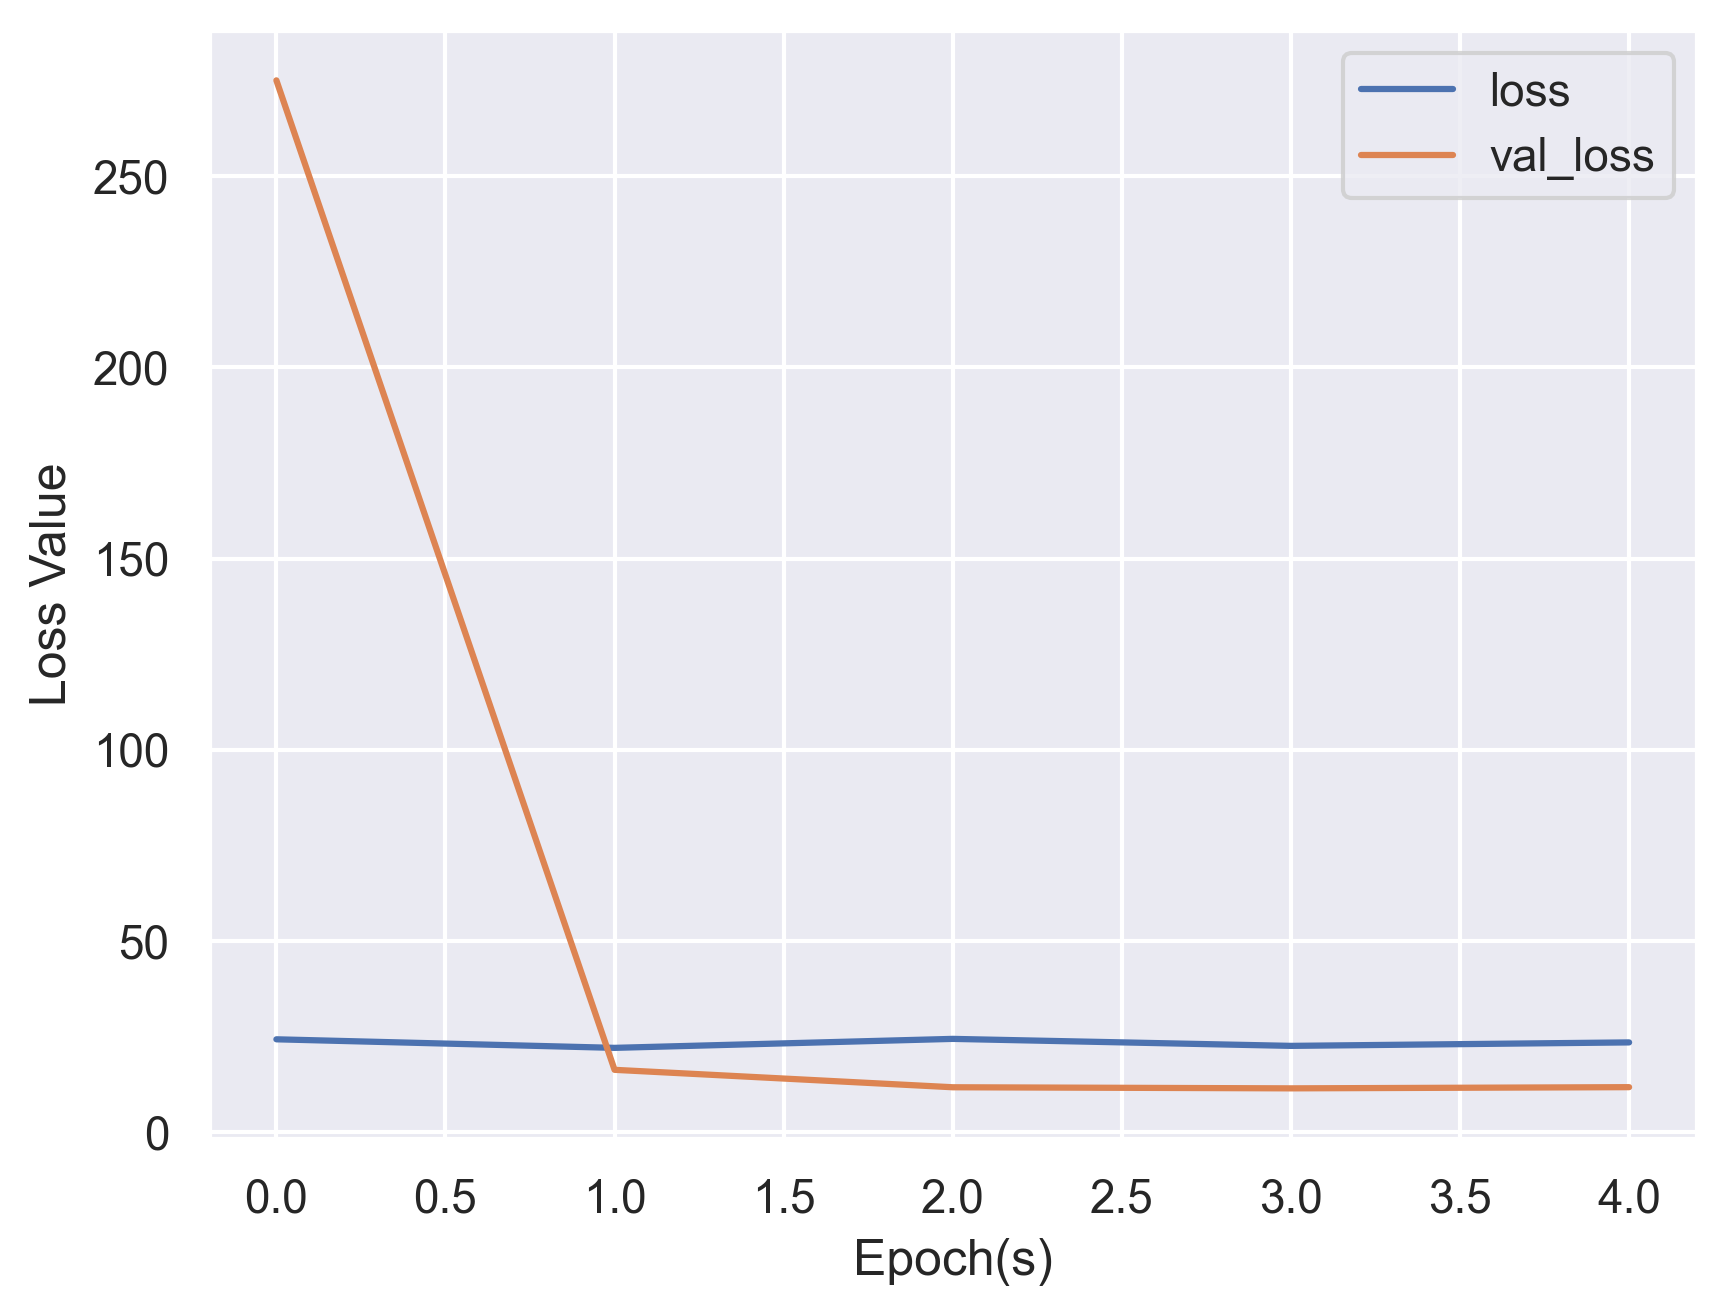

In [177]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.xlabel("Epoch(s)")
plt.ylabel('Loss Value')
plt.legend(['loss', 'val_loss'], loc='upper right')